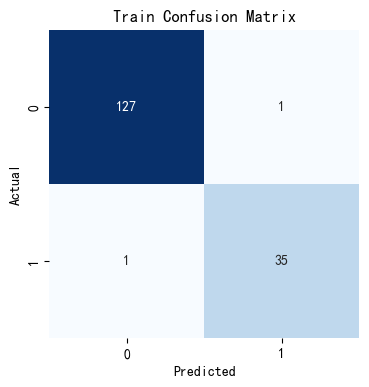

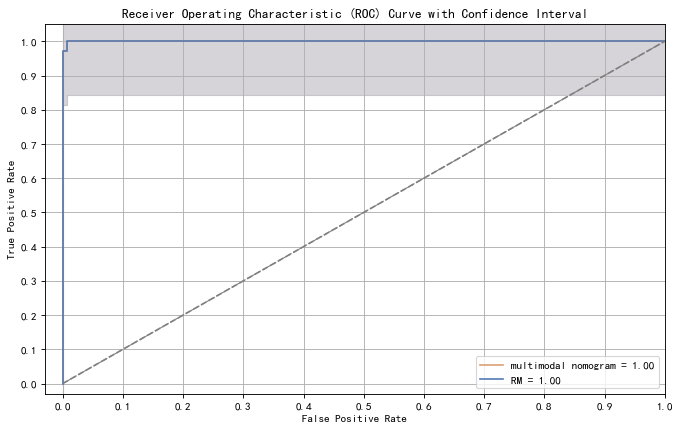

In [45]:
import matplotlib.pyplot as plt
# Plot macro-average ROC curve
from sklearn.metrics import roc_curve, auc,confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
# 读取数据
train_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\pc_is.csv")
train_CLA = train_data['pred_probability']
Y_train = train_data['label']

test_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\pc_rm_ULR.csv")
test_CLA = test_data['pred_probability']
Y_test = test_data['label']

val_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\pc_rm_MLR.csv")
val_CLA = val_data['pred_probability']
Y_val = val_data['label']

def calculate_confidence_interval(data, confidence=0.95):
    mean_value = np.mean(data)
    std_dev = np.std(data)
    lower_bound = mean_value - 1.96 * (std_dev / np.sqrt(len(data)))
    upper_bound = mean_value + 1.96 * (std_dev / np.sqrt(len(data)))
    
    return lower_bound, upper_bound

# 修改阈值
threshold = 0.5  # 举例，修改阈值为0.5

# 重新分类样本
train_predictions = (train_CLA > threshold).astype(int)
test_predictions = (test_CLA > threshold).astype(int)
val_predictions = (val_CLA > threshold).astype(int)

# 计算 ROC 曲线和 AUC
# 重新计算 ROC 曲线和 AUC
prob_true_train, prob_pred_train, _ = roc_curve(Y_train, train_CLA)
prob_true_val, prob_pred_val, _ = roc_curve(Y_val, val_CLA)
prob_true_test, prob_pred_test, _ = roc_curve(Y_test, test_CLA)

# prob_true_train, prob_pred_train, _ = roc_curve(Y_train, train_predictions)
# prob_true_val, prob_pred_val, _ = roc_curve(Y_val, val_predictions)
# prob_true_test, prob_pred_test, _ = roc_curve(Y_test, test_predictions)

roc_auc_train = auc(prob_true_train, prob_pred_train)
roc_auc_val = auc(prob_true_val, prob_pred_val)
roc_auc_test = auc(prob_true_test, prob_pred_test)
# 计算置信区间
conf_int_train_lower, conf_int_train_upper = calculate_confidence_interval(train_CLA)
conf_int_val_lower, conf_int_val_upper = calculate_confidence_interval(val_CLA)
conf_int_test_lower, conf_int_test_upper = calculate_confidence_interval(test_CLA)

def plot_confusion_matrix(Y_true, Y_pred, title):
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_confusion_matrix(Y_train, train_predictions, "Train Confusion Matrix")
# 绘制 ROC 曲线
plt.figure(figsize=(10, 6), dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(prob_true_train, prob_pred_train, label=f'multimodal nomogram = {roc_auc_train:.2f}', color='#DD9F75')
plt.fill_between(prob_true_train, prob_pred_train - conf_int_train_lower, prob_pred_train + conf_int_train_upper, color='#DD9F75', alpha=0.2)

# plt.plot(prob_true_test, prob_pred_test, label=f'RM_ULR_Train_AUC = {roc_auc_test:.2f}', color='#006F3C')
# plt.fill_between(prob_true_test, prob_pred_test + conf_int_test_upper, prob_pred_test - conf_int_test_lower, color='#006F3C', alpha=0.2)

plt.plot(prob_true_val, prob_pred_val, label=f'RM = {roc_auc_val:.2f}', color='#547BB4')
plt.fill_between(prob_true_val, prob_pred_val + conf_int_val_upper, prob_pred_val - conf_int_val_lower, color='#547BB4', alpha=0.2)



plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim([-0.03, 1])
plt.ylim([-0.03, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic (ROC) Curve with Confidence Interval')
plt.show()

平滑ROC曲线

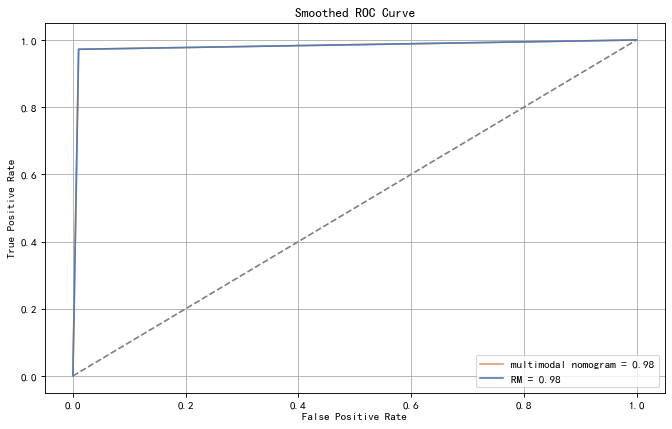

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d

# 读取数据
train_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\pc_is.csv")
train_CLA = train_data['pred_probability']
Y_train = train_data['label']

# test_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\pc_rm_ULR.csv")
# test_CLA = test_data['pred_probability']
# Y_test = test_data['label']

val_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\pc_rm_MLR.csv")
val_CLA = val_data['pred_probability']
Y_val = val_data['label']

# 修改阈值
threshold = 0.5  # 举例，修改阈值为0.5

# 重新分类样本
train_predictions = (train_CLA > threshold).astype(int)
test_predictions = (test_CLA > threshold).astype(int)
val_predictions = (val_CLA > threshold).astype(int)

# 计算 ROC 曲线和 AUC
# 重新计算 ROC 曲线和 AUC
prob_true_train, prob_pred_train, _ = roc_curve(Y_train, train_CLA)
prob_true_val, prob_pred_val, _ = roc_curve(Y_val, val_CLA)
# prob_true_test, prob_pred_test, _ = roc_curve(Y_test, test_CLA)
# 计算平滑的 ROC 曲线（使用线性插值）
# 去除重复值
unique_prob_true_train, unique_index_train = np.unique(prob_true_train, return_index=True)
prob_pred_train_unique = prob_pred_train[unique_index_train]

unique_prob_true_val, unique_index_val = np.unique(prob_true_val, return_index=True)
prob_pred_val_unique = prob_pred_val[unique_index_val]
# 计算平滑的 ROC 曲线
fpr_smooth = np.linspace(0, 1, 1000)  # 平滑化的 FPR 范围
# tpr_smooth_train = interp1d(prob_true_train, prob_pred_train, kind='cubic')(fpr_smooth)
# tpr_smooth_val = interp1d(prob_true_val, prob_pred_val, kind='cubic')(fpr_smooth)
# tpr_smooth_test = interp1d(prob_true_test, prob_pred_test, kind='cubic')(fpr_smooth)
tpr_smooth_train = interp1d(unique_prob_true_train, prob_pred_train_unique, kind='linear')(fpr_smooth)
tpr_smooth_val = interp1d(unique_prob_true_val, prob_pred_val_unique, kind='linear')(fpr_smooth)
# 计算 AUC
roc_auc_train = auc(fpr_smooth, tpr_smooth_train)
roc_auc_val = auc(fpr_smooth, tpr_smooth_val)
# roc_auc_test = auc(fpr_smooth, tpr_smooth_test)

# 绘制 ROC 曲线
plt.figure(figsize=(10, 6), dpi=80)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr_smooth, tpr_smooth_train, label=f'multimodal nomogram = {roc_auc_train:.2f}', color='#DD9F75')
plt.plot(fpr_smooth, tpr_smooth_val, label=f'RM = {roc_auc_val:.2f}', color='#547BB4')
# plt.plot(fpr_smooth, tpr_smooth_test, label=f'RM_ULR_Train_AUC = {roc_auc_test:.2f}', color='#006F3C')

plt.legend(loc='lower right')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Smoothed ROC Curve')
plt.show()


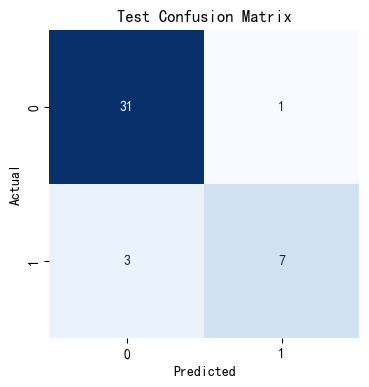

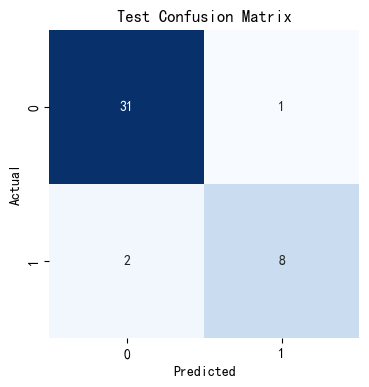

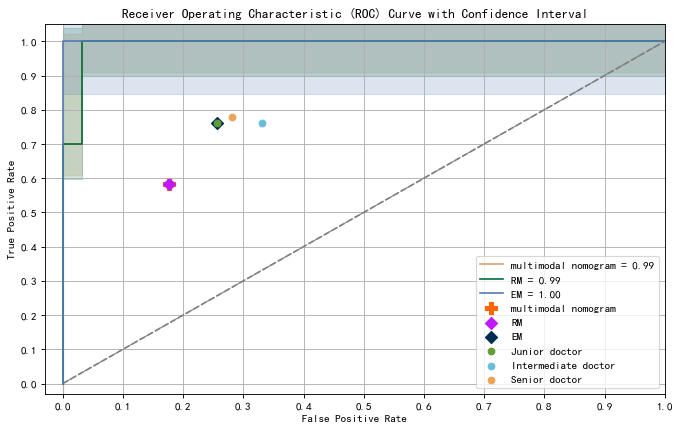

In [21]:
import matplotlib.pyplot as plt
# Plot macro-average ROC curve
import seaborn as sns
from sklearn.metrics import roc_curve, auc,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
# 读取数据
train_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\tc1_is.csv")
train_CLA = train_data['pred_probability']
Y_train = train_data['label']

test_data = pd.read_csv(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\tc1_rm_MLR.csv")
test_CLA = test_data['pred_probability']
Y_test = test_data['label']

val_data = pd.read_excel(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob0223\EMmanyVote-LHH0-0.75to0.5.xlsx")
val_CLA = val_data['pred_probability']
Y_val = val_data['label']

small_data = pd.read_excel(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob\EM\EM-0.75to0.5\EM2-0.75to0.5.xlsx")
small_CLA = val_data['pred_probability']
Y_small = val_data['label']

mid_data = pd.read_excel(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob\EM\EM-0.75to0.5\EM1-0.75to0.5.xlsx")
mid_CLA = mid_data['pred_probability']
Y_mid = mid_data['label']

big_data = pd.read_excel(r"E:\SFYdataJPG\Code\imagescore5\imagescore5\prob\EM\EM-0.75to0.5\EM3-0.75to0.5.xlsx")
big_CLA = big_data['pred_probability']
Y_big = big_data['label']

def calculate_confidence_interval(data, confidence=0.95):
    mean_value = np.mean(data)
    std_dev = np.std(data)
    lower_bound = mean_value - 1.96 * (std_dev / np.sqrt(len(data)))
    upper_bound = mean_value + 1.96 * (std_dev / np.sqrt(len(data)))
    
    return lower_bound, upper_bound

# # 修改阈值
threshold = 0.5  # 举例，修改阈值为0.5

# # 重新分类样本
train_predictions = (train_CLA > threshold).astype(int)
test_predictions = (test_CLA > threshold).astype(int)
val_predictions = (val_CLA > threshold).astype(int)

small_predictions = (small_CLA > threshold).astype(int)
mid_predictions = (mid_CLA > threshold).astype(int)
big_predictions = (big_CLA > threshold).astype(int)
# # 计算 ROC 曲线和 AUC
# # 重新计算 ROC 曲线和 AUC
prob_true_m, prob_pred_m, _ = roc_curve(Y_train, train_predictions)
prob_true_e, prob_pred_e, _ = roc_curve(Y_val, val_predictions)
prob_true_r, prob_pred_r, _ = roc_curve(Y_test, test_predictions)

# # 计算 ROC 曲线和 AUC
prob_true_train, prob_pred_train, _ = roc_curve(Y_train, train_CLA)
prob_true_val, prob_pred_val, _ = roc_curve(Y_val, val_CLA)
prob_true_test, prob_pred_test, _ = roc_curve(Y_test, test_CLA)
roc_auc_train = auc(prob_true_train, prob_pred_train)
roc_auc_val = auc(prob_true_val, prob_pred_val)
roc_auc_test = auc(prob_true_test, prob_pred_test)
# 计算置信区间
conf_int_train_lower, conf_int_train_upper = calculate_confidence_interval(train_CLA)
conf_int_val_lower, conf_int_val_upper = calculate_confidence_interval(val_CLA)
conf_int_test_lower, conf_int_test_upper = calculate_confidence_interval(test_CLA)

# average_performance = small_data.groupby('label').agg({'pred_probability': 'mean'}).reset_index()
# prob_true_small, prob_pred_small,_ = roc_curve(Y_small, small_predictions)
# prob_true_mid, prob_pred_mid, _ = roc_curve(Y_mid, mid_predictions)
# prob_true_big, prob_pred_big, _ = roc_curve(Y_big, big_predictions)
# print(prob_true_small)
def plot_confusion_matrix(Y_true, Y_pred, title):
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_confusion_matrix(Y_train, train_predictions, "Test Confusion Matrix")
plot_confusion_matrix(Y_mid, mid_predictions, "Test Confusion Matrix")
prob_true_small, prob_pred_small,_ = roc_curve(Y_small, small_CLA)
prob_true_mid, prob_pred_mid, _ = roc_curve(Y_mid, mid_CLA)
prob_true_big, prob_pred_big, _ = roc_curve(Y_big, big_CLA)
# roc_auc_small = auc(prob_true_small, prob_pred_small).mean()

# roc_auc_mid = auc(prob_true_mid, prob_pred_mid).mean()

# roc_auc_big = auc(prob_true_big, prob_pred_big).mean()
# average_fpr_m = np.mean(prob_true_m)
# average_tpr_m = np.mean(prob_pred_m)
# average_fpr_r = np.mean(prob_true_r)
# average_tpr_r = np.mean(prob_pred_r)
# average_fpr_e = np.mean(prob_true_e)
# average_tpr_e = np.mean(prob_pred_e)
#无阈值
average_fpr_m = np.mean(prob_true_train)
average_tpr_m = np.mean(prob_pred_train)
average_fpr_r = np.mean(prob_true_test)
average_tpr_r = np.mean(prob_pred_test)
average_fpr_e = np.mean(prob_true_val)
average_tpr_e = np.mean(prob_pred_val)

average_fpr_small = np.mean(prob_true_small)
average_tpr_small = np.mean(prob_pred_small)
# print(average_fpr_small,average_tpr_small)
average_fpr_mid = np.mean(prob_true_mid)
average_tpr_mid = np.mean(prob_pred_mid)

average_fpr_big = np.mean(prob_true_big)
average_tpr_big = np.mean(prob_pred_big)

# 绘制 ROC 曲线
plt.figure(figsize=(10, 6), dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(prob_true_train, prob_pred_train, label=f'multimodal nomogram = {roc_auc_train:.2f}', color='#DD9F75')
plt.fill_between(prob_true_train, prob_pred_train - conf_int_train_lower, prob_pred_train + conf_int_train_upper, color='#DD9F75', alpha=0.2)

plt.plot(prob_true_test, prob_pred_test, label=f'RM = {roc_auc_test:.2f}', color='#006F3C')
plt.fill_between(prob_true_test, prob_pred_test + conf_int_test_upper, prob_pred_test - conf_int_test_lower, color='#006F3C', alpha=0.2)

plt.plot(prob_true_val, prob_pred_val, label=f'EM = {roc_auc_val:.2f}', color='#547BB4')
plt.fill_between(prob_true_val, prob_pred_val + conf_int_val_upper, prob_pred_val - conf_int_val_lower, color='#547BB4', alpha=0.2)

# 创建包含 AUC 值的 DataFrame
# average_performance_df = pd.DataFrame({'label': ['Average Performance'], 'pred_probability': [roc_auc_small]})
# average_performance_df.to_csv(os.path.join(r'E:\SFYdataJPG\Code\imagescore5\imagescore5\result', 'average_performance.csv'), index=False)
plt.xticks([])
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim([-0.03, 1])
plt.ylim([-0.03, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tain ROC Curve')
# 在现有画布上添加散点图

## plt.scatter(roc_auc_small['label'], roc_auc_small['pred_probability'], marker='o', color='green', label='Average Performance')
# plt.scatter(average_fpr_small, average_tpr_small, marker='o', color='#629C35', label=f'Junior doctor= {roc_auc_small:.2f}')
# plt.scatter(average_fpr_mid, average_tpr_mid, marker='o', color='#68BED9', label=f'Intermediate doctor= {roc_auc_mid:.2f}')
# plt.scatter(average_fpr_big, average_tpr_big, marker='o', color='#EAA558', label=f'Senior doctor= {roc_auc_big:.2f}')

#三个模型的平均 性能评估点
plt.scatter(average_fpr_m, average_tpr_m,s=100,  marker='P', color='#ff6600', label='multimodal nomogram')
plt.scatter(average_fpr_r, average_tpr_r,s=60, marker='D', color='#bf19ff', label='RM')
plt.scatter(average_fpr_e, average_tpr_e,s=60, marker='D', color='#002c53', label='EM')

plt.scatter(average_fpr_small, average_tpr_small, marker='o', color='#629C35', label='Junior doctor')
plt.scatter(average_fpr_mid, average_tpr_mid, marker='o', color='#68BED9', label='Intermediate doctor')
plt.scatter(average_fpr_big, average_tpr_big, marker='o', color='#EAA558', label='Senior doctor')



plt.legend(loc='lower right')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic (ROC) Curve with Confidence Interval')
plt.show()